<a href="https://colab.research.google.com/github/lhiwi/AI-Principles_-advanced-searching/blob/main/DFS_and_BFS_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **BFS and DFS implementation**

---



# **The state space graph for the map on fig 1**

In [4]:
import networkx as nx
import matplotlib.pyplot as plt
from collections import deque
graph = {
    "Addis Ababa": ["Adama", "Ambo", "Debre Birhan"],
    "Adama": ["Addis Ababa", "Assela", "Batu"],
    "Ambo": ["Addis Ababa", "Nekemte"],
    "Batu": ["Adama", "Hawassa"],
    "Debre Birhan": ["Addis Ababa", "Debre Sina"],
    "Debre Sina": ["Debre Birhan", "Kemise"],
    "Kemise": ["Debre Sina", "Dessie"],
    "Dessie": ["Kemise", "Woldia"],
    "Woldia": ["Dessie", "Lalibela", "Alamata"],
    "Lalibela": ["Woldia", "Debre Tabor"],
    "Debre Tabor": ["Lalibela", "Gondar"],
    "Gondar": ["Debre Tabor", "Azezo"],
    "Azezo": ["Gondar", "Metema"],
    "Metema": ["Azezo", "Humera"],
    "Humera": ["Metema", "Shire"],
    "Shire": ["Humera", "Axum"],
    "Axum": ["Shire", "Adigrat"],
    "Adigrat": ["Axum", "Asmara"],
    "Asmara": ["Adigrat", "Keren"],
    "Keren": ["Asmara"],
    "Dire Dawa": ["Harar", "Awash"],
    "Harar": ["Dire Dawa", "Jijiga"],
    "Jijiga": ["Harar", "Tog Wajaale"],
    "Awash": ["Dire Dawa", "Chiro"],
    "Chiro": ["Awash", "Gobi Rasu"],
    "Gobi Rasu": ["Chiro", "Debre Sina"],

    "Assela": ["Adama", "Bale", "Dodola"],
    "Bale": ["Assela", "Goba"],
    "Dodola": ["Assela", "Shashamane"],
    "Shashamane": ["Dodola", "Hawassa"],
    "Hawassa": ["Batu", "Shashamane", "Dilla"],
    "Dilla": ["Hawassa", "Yirga Alem"],

    "Yirga Alem": ["Dilla", "Bule Hora"],
    "Bule Hora": ["Yirga Alem", "Konso"],
    "Konso": ["Bule Hora", "Arba Minch"],
    "Arba Minch": ["Konso", "Jinka"],
    "Jinka": ["Arba Minch", "Bench Maji"],
    "Bench Maji": ["Jinka", "Gambela"],

    "Gambela": ["Bench Maji", "Assosa"],
    "Assosa": ["Gambela", "Gimbi"],
    "Gimbi": ["Assosa", "Nekemte"],
    "Nekemte": ["Gimbi", "Ambo"],

    "Tog Wajaale": ["Jijiga", "Hargeisa"],
    "Moyale": ["Yabelo", "Nairobi"],
    "Nairobi": ["Moyale", "Juba"],
    "Juba": ["Nairobi", "Bench Maji"],
    "Mogadishu": ["Kebri Dehar", "Hargeisa"],
    "Hargeisa": ["Tog Wajaale", "Mogadishu"],
}

# **Implement BFS for the shortest path**

In [2]:
def bfs_shortest_path(graph, start, goal):
    queue = deque([[start]])  # Initialize queue with a path containing the start city
    visited = set()  # Keep track of visited cities

    while queue:
        path = queue.popleft()
        city = path[-1]
        if city == goal:
            return path  # returns shortest path
        if city not in visited:
            visited.add(city)
            for neighbor in graph.get(city, []):
                new_path = path + [neighbor]
                queue.append(new_path)
    return None

# Example: Find the shortest path from Addis Ababa to Gondar
shortest_path = bfs_shortest_path(graph, "Addis Ababa", "Gondar")
print("Shortest Path:", shortest_path)

Shortest Path: ['Addis Ababa', 'Debre Birhan', 'Debre Sina', 'Kemise', 'Dessie', 'Woldia', 'Lalibela', 'Debre Tabor', 'Gondar']


# **Implement DFS for any path**

In [3]:
def dfs_any_path(graph, start, goal, path=None, visited=None):
    if path is None:
        path = [start]
    if visited is None:
        visited = set()
    if start == goal:
        return path  # Return the first found path
    visited.add(start)
    for neighbor in graph.get(start, []):
        if neighbor not in visited:
            new_path = dfs_any_path(graph, neighbor, goal, path + [neighbor], visited)
            if new_path:
                return new_path  # Return the first valid path found
    return None

# Example: Find any path from Addis Ababa to Gondar
any_path = dfs_any_path(graph, "Addis Ababa", "Gondar")
print("Any Path:", any_path)


Any Path: ['Addis Ababa', 'Debre Birhan', 'Debre Sina', 'Kemise', 'Dessie', 'Woldia', 'Lalibela', 'Debre Tabor', 'Gondar']


## **Create the graph using NetworkX and visualize shortest path**

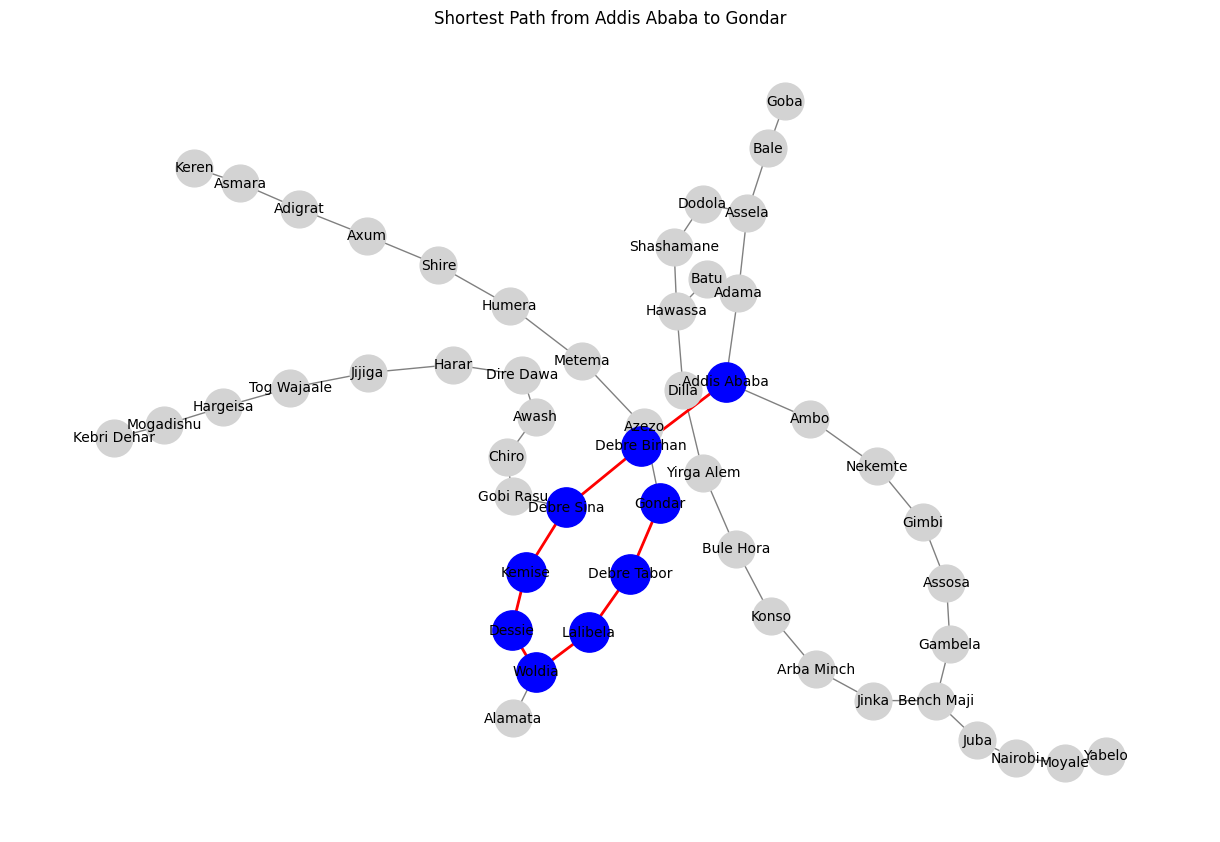

In [5]:

G = nx.Graph()

# Adding nodes and edges
for city, neighbors in graph.items():
    for neighbor in neighbors:
        G.add_edge(city, neighbor)

# Visualizing the graph
def visualize_graph_with_path(graph, start, goal):
    # Find the shortest path using BFS
    shortest_path = bfs_shortest_path(graph, start, goal)
    # Draw the graph
    plt.figure(figsize=(12, 8))
    pos = nx.spring_layout(G, seed=42)

    # Draw all nodes and edges
    nx.draw(G, pos, with_labels=True, node_color="lightgray", edge_color="gray", node_size=700, font_size=10)

    if shortest_path:
        # Highlight nodes and edges in the shortest path
        path_edges = list(zip(shortest_path, shortest_path[1:]))
        nx.draw_networkx_nodes(G, pos, nodelist=shortest_path, node_color="blue", node_size=800)
        nx.draw_networkx_edges(G, pos, edgelist=path_edges, edge_color="red", width=2)

    # Add title
    plt.title(f"Shortest Path from {start} to {goal}")
    plt.show()

# Step 5: Define start and goal cities
start_city = "Addis Ababa"
goal_city = "Gondar"

# Visualize the graph
visualize_graph_with_path(graph, start_city, goal_city)